# Task 5.1: Student Pass/Fail Prediction using Logistic Regression

Predict whether a student will pass or fail based on their study hours and attendance using logistic regression.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Step 1: Load and Inspect Dataset

In [13]:
df = pd.read_csv("student_data.csv")

print("Shape:", df.shape)
df.info()
df.describe()
df.head()

Shape: (500, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  500 non-null    float64
 1   Attendance   500 non-null    float64
 2   Pass         500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


,Study Hours,Attendance,Pass
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


## Step 2: Data Cleaning & Visualization

### Missing values

In [15]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64


### Histograms

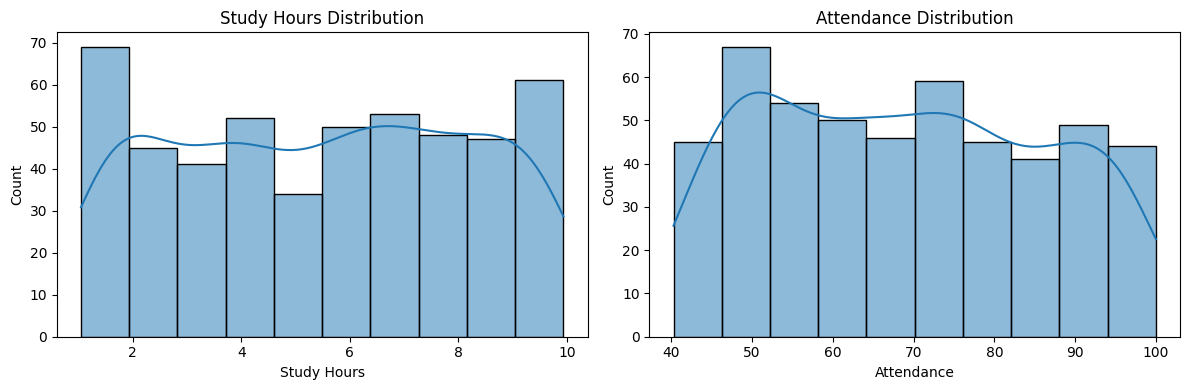

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Study Hours'], kde=True)
plt.title("Study Hours Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['Attendance'], kde=True)
plt.title("Attendance Distribution")
plt.tight_layout()
plt.show()

### Scatter plot

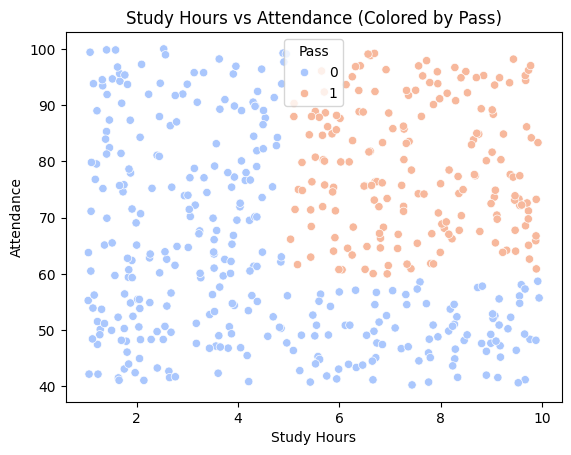

In [17]:
sns.scatterplot(data=df, x='Study Hours', y='Attendance', hue='Pass', palette='coolwarm')
plt.title("Study Hours vs Attendance (Colored by Pass)")
plt.show()

### Correlation matrix

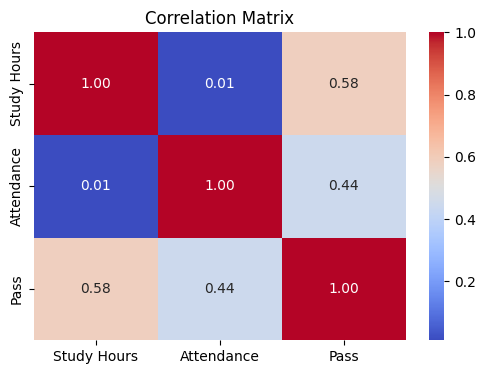

In [22]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Step 3: Train Logistic Regression Model
- Split data into train/test
- Train model using `Study Hours` and `Attendance`

In [23]:
# Features and target
X = df[['Study Hours', 'Attendance']]
y = df['Pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Step 4: Model Evaluation
- Predict on test data
- Evaluate using Accuracy and Confusion Matrix

Accuracy: 86.0 %


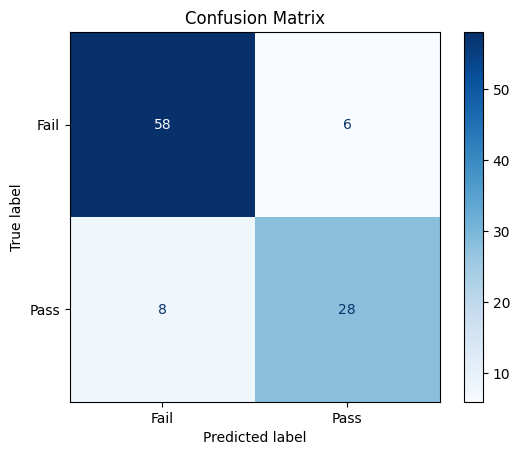

In [24]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Fail", "Pass"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## Step 5: Summary and Insights

### Key Observations:

- Both `Study Hours` and `Attendance` positively correlate with passing probability.
- Logistic Regression achieved an accuracy of **86.0%**.
- The confusion matrix indicates how well the model distinguishes pass vs fail.

### Recommendation:

- Students below certain thresholds in both Study Hours and Attendance are at high risk of failing — early interventions should focus here.